NameError: name 'code_sizes' is not defined

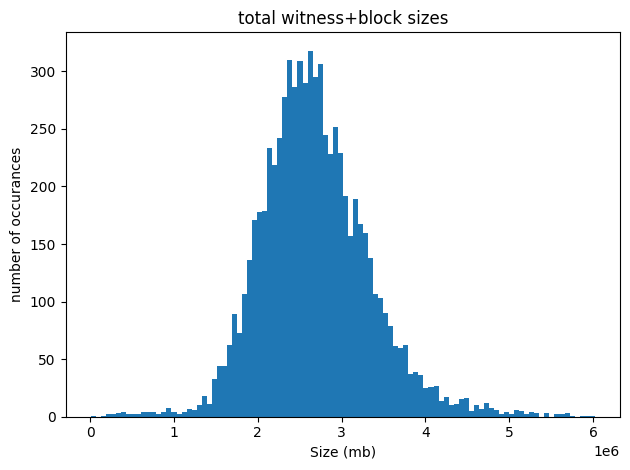

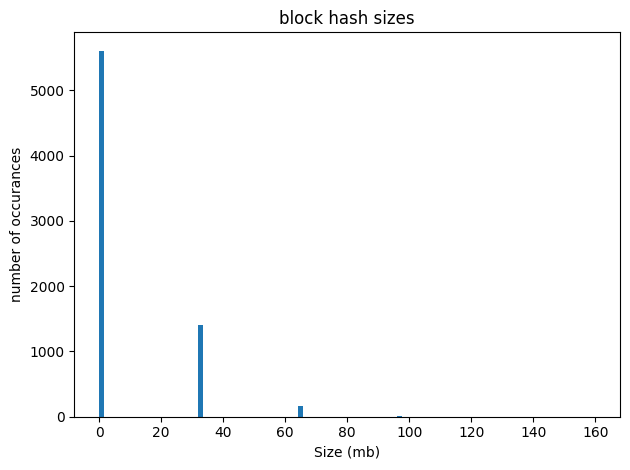

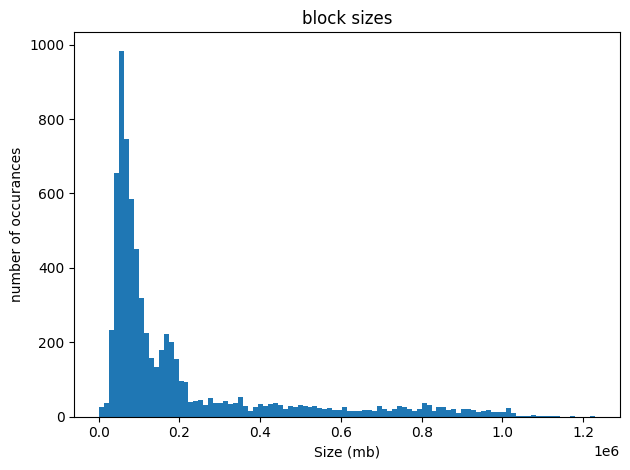

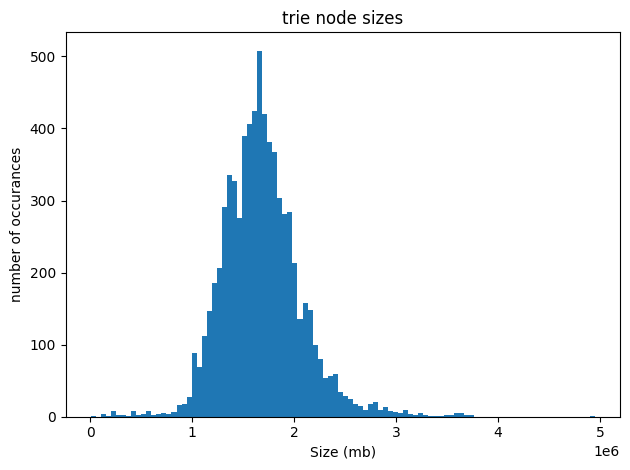

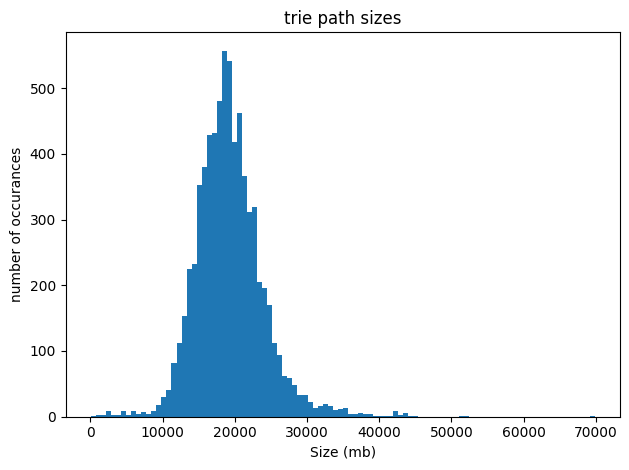

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

def size_multiplier(size):
    if size == "B":
        return 1
    elif size == "KiB":
        return 1000
    elif size == "MiB":
        return 1_000_000
    else:
        raise Exception("invalid value {}".format(size))

def extract_count_and_size(line: str):
    parts = [part for part in line.strip('\n').split(' ') if part]
    cnt = parts[5]
    size = size_multiplier(parts[8]) * float(parts[7])

    return cnt, size

def extract_block_size(line: str):
    parts = [part for part in line.strip('\n').split(' ') if part]
    return size_multiplier(parts[10]) * float(parts[9])

def extract_total_size(line: str):
    parts = [part for part in line.strip('\n').split(' ') if part]
    return size_multiplier(parts[8]) * float(parts[7])

block_hash_sizes = []
owner_sizes = []
node_counts = []
node_sizes = []
path_counts = []
path_sizes = []
code_hash_sizes = []
code_sizes = []
block_sizes = []
total_sizes = []


vals = []
with open('witness-sizes-reduced.txt', 'r') as f:
    lines = f.readlines()
    it = iter(lines)
    for line in it:
        if "summary" in line:
            block_hash_count, block_hash_size = extract_count_and_size(next(it))
            owner_count, owner_size = extract_count_and_size(next(it))
            node_count, node_size = extract_count_and_size(next(it))
            path_count, path_size = extract_count_and_size(next(it))
            code_count, code_size = extract_count_and_size(next(it))
            code_hash_count, code_hash_size = extract_count_and_size(next(it))
            block_size = extract_block_size(next(it))
            total_size = extract_total_size(next(it))

            block_hash_sizes.append(block_hash_size)
            owner_sizes.append(owner_size)
            node_counts.append(node_count)
            node_sizes.append(node_size)
            path_counts.append(path_count)
            path_sizes.append(path_size)
            code_hash_sizes.append(code_hash_size)
            code_sizes.append(code_size)
            block_sizes.append(block_size)
            total_sizes.append(total_size)

def plot_hist(dist, title):
    
    #fig, axs = #plt.subplots(1, 2, sharey=True, tight_layout=True)
    
    # We can set the number of bins with the *bins* keyword argument.
    #axs[0].hist(dist1, bins=n_bins)
    
    fig, ax = plt.subplots(tight_layout=True)
    plt.xlabel("Size (mb)")
    plt.ylabel("number of occurances")
    plt.title(title)
    ax.hist(dist, bins=100)

plot_hist(total_sizes, "total witness+block sizes")
plot_hist(block_hash_sizes, "block hash sizes")
plot_hist(block_sizes, "block sizes")
plot_hist(node_sizes, "trie node sizes")
plot_hist(path_sizes, "trie path sizes")
plot_hist(code_sizes, "proof code sizes")
print("done")